In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
img = cv2.imread('./testimages/image_31.jpeg')
img.shape

(299, 168, 3)

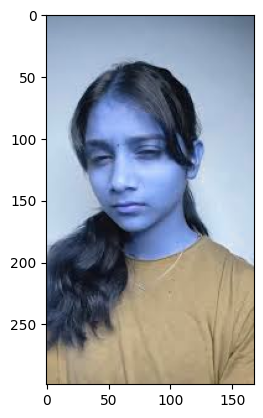

In [6]:
plt.imshow(img)

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(299, 168)

In [11]:
gray

array([[151, 152, 152, ..., 113, 113, 112],
       [152, 152, 153, ..., 114, 113, 113],
       [153, 154, 154, ..., 114, 114, 113],
       ...,
       [144, 144, 144, ..., 155, 155, 154],
       [146, 146, 146, ..., 155, 155, 153],
       [150, 150, 150, ..., 155, 155, 153]], dtype=uint8)

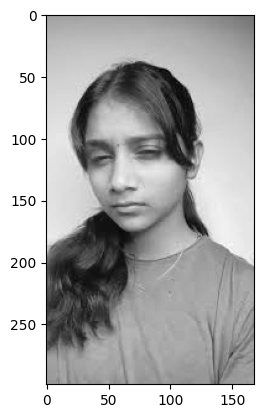

In [13]:
plt.imshow(gray, cmap='gray')

In [14]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[13, 76, 98, 98]])

In [15]:
(x,y,w,h) = faces[0]
x,y,w,h

(13, 76, 98, 98)

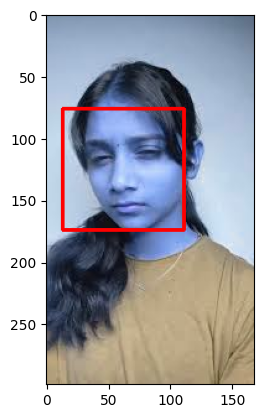

In [16]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

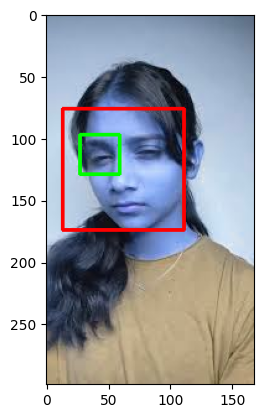

In [17]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

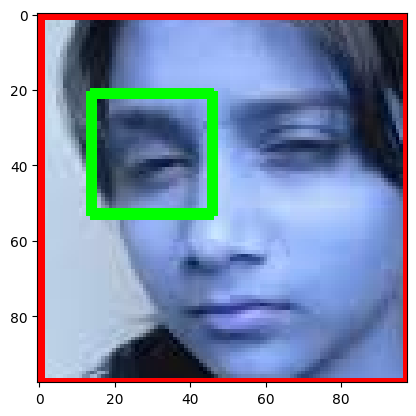

In [18]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [21]:
cropped_img = np.array(roi_color)
cropped_img.shape

(98, 98, 3)

In [19]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

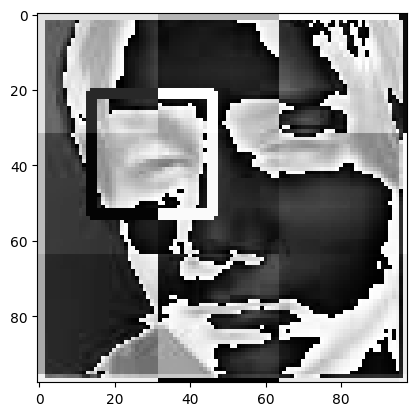

In [22]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [23]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

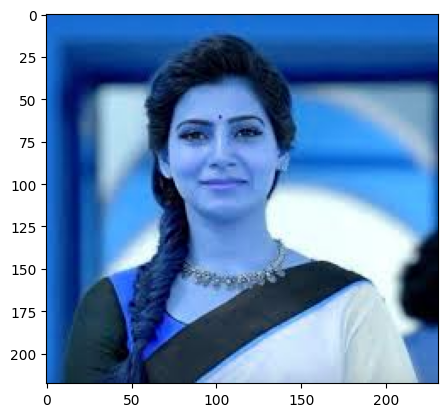

In [32]:
original_image = cv2.imread('./testimages/image_17.jpeg')
plt.imshow(original_image)

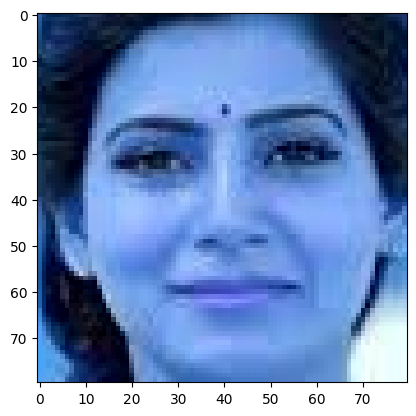

In [31]:
cropped_image = get_cropped_image_if_2_eyes('./testimages/image_17.jpeg')
# print(type(cropped_image))
# print(cropped_image)
plt.imshow(cropped_image)


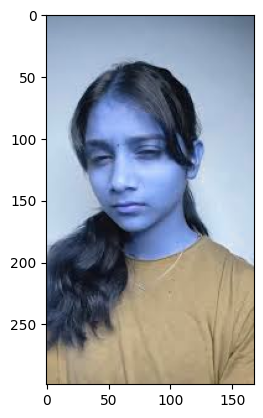

In [34]:
org_image_obstructed = cv2.imread('./testimages/image_31.jpeg')
plt.imshow(org_image_obstructed)

In [41]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./testimages/image_31.jpeg')
cropped_image_no_2_eyes

In [42]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [43]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [44]:
img_dirs

['./dataset/allu arjun pics',
 './dataset/cropped',
 './dataset/samantha pics',
 './dataset/sindhuri pics',
 './dataset/vijay thalapathy pics',
 './dataset/virat kohli pics']

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [48]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = os.path.basename(img_dir)
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        if entry.is_file() and entry.name.lower().endswith(('.png', '.jpg', '.jpeg')):
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder:", cropped_folder)
                
                cropped_file_name = f"{celebrity_name}_{count}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
                
                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1
